# Домашнее задание "Визуализация данных в Python"

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

Я выбрала статистику по выгоранию людей (ibm-hr-analytics-attrition-dataset). Было проанализировано 1470 чел.

Выводы из анализа данных:
1. БОльшая доля из проанализированных людей не истощена. (круговая диаграмма, распределение значений. Знаю, что Вы говорили, мозг плохо сравнивает объемы, но в данном случае, все наглядно.)
2. Возраст, в котором чаще всего происходит выгорание составляет от 26 до 35 лет. (столбчатая диараммма распределения по возрасту)
3. Выгорание чаще всго происходит у мужчин, наиболее частый вораст выгорания от 23 до 37 лет, у женщин возрвст выгорания начинаетися позже и заканчивается раньше - диапазон примерно от 26 до 35 лет. (диаграмма с областями, распределение женщин и мужчин по возрасту)
4. Чаще всего люди выгорают в департаменте "Разработки и исследования", возраст колеблется от 18 до 58, основные выгоревшие (50% выгоревших) находятся в возрасте от 28 до 42 лет.Средний возраст (медианное зачение) истощенных в этом департаменте 36 лет. Очень близок по истощению к департаменту "Разработки и исследования" департамент "Продаж", только верхняя граница возраста истощенных чуть ниже на несколько лет. В департаменте "Человеческих ресурсов" выгоревших людей меньше в 2 раза, чем в других департаментах. Однако, в департаменте "Человеческих ресурсов" есть человек, который выделяется из основной массы, его возраст выше верхней границы на примерно 7 лет.
5. в департаменте "Разработки и исследования" чаще всего выгорают лаборанты и научные сотрудники. Основной возраст 24 -32 года. Меньше всего подвепжены выгоранию директор по исследованиям и управляющи, скорее всего потому что их просто единицы. (возможно, этот график не самое лучший для представления этих даннех, т.к. много пропусков,а лучше подошел бы boxplot, но мне очень хотелось его сформировать)
6. Дальше просто тренировалась строить графики. 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#data.info()

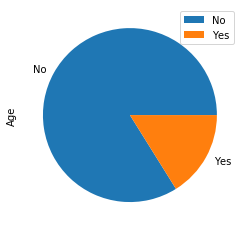

In [17]:
#анализируем, кого больше:истощенных или нет
data_attrition = data.groupby(['Attrition']).count()
data_attrition.head()
data_attrition.plot(kind='pie', y = 'Age' )

In [22]:
#отберем только истощенных людей
data_2 = data[data.Attrition == 'Yes']
#data_2.head()

<BarContainer object of 39 artists>

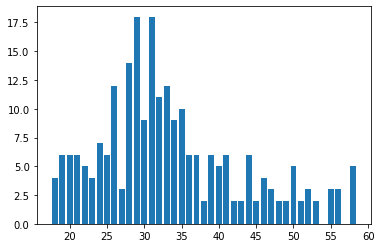

In [34]:
#анализируем возраст истощенных людей
data_2_age = data_2.groupby(['Age']).count().reset_index()
plt.bar(data_2_age['Age'],data_2_age['Attrition'] )

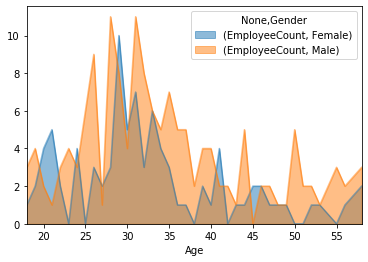

In [79]:
#кого больше среди выгоревших: мужчин или женщин
data_2_gender = data_2.groupby(['Age', 'Gender']).count().filter(items = ['Age', 'Gender','EmployeeCount'])
#data_2_gender = data_2.groupby(['Age', 'Gender']).sum().reset_index()
data_2_gender.unstack('Gender').plot(kind = 'area', stacked=False)

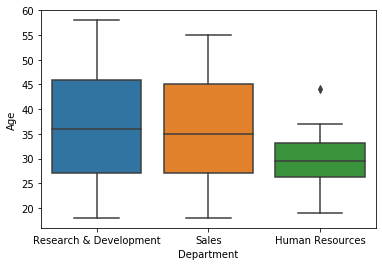

In [103]:
#какой департамент чаще подвержен выгоранию и в каком возрасте
data_2_department = data_2.groupby(['Age','Department']).count().reset_index().filter(items = ['Age', 'Department','EmployeeCount'])
data_2_department.head()
ax = sns.boxplot(x='Department', y='Age', data = data_2_department)

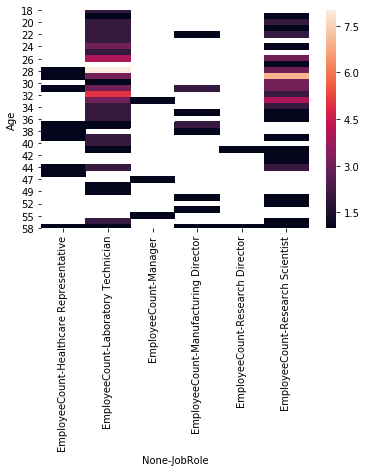

In [110]:
#какую должность больше всего приводит к выгоранию. Смотрим департамент с самым большим количеством выгоревших сотрудников.
data_2_job = data_2[data_2.Department == 'Research & Development'].groupby(['Age','JobRole']).count().filter(items = ['Age', 'JobRole','EmployeeCount'])
ax = sns.heatmap(data_2_job.unstack('JobRole'))

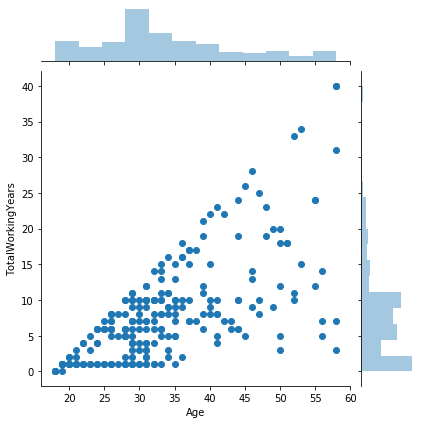

In [129]:
# взаимносвязь общего стажа работы и возраста у выгоревших
sns.jointplot(x='Age', y='TotalWorkingYears', 
              data=data_2, kind='scatter')

In [121]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [158]:
data_2_work = data_2.groupby(['Age']).mean().filter(items = ['Age', 'TotalWorkingYears'])
data_2_work2 = data_2.groupby(['Age']).count().filter(items = ['Age', 'Attrition'])
data_2_work3 = data_2_work.join(data_2_work2).reset_index()
data_2_work3.head()
#a = data_2_work.unstack('TotalWorkingYears').reset_index()
#a.head()

,Age,TotalWorkingYears,Attrition
0,18,0.000000,4
1,19,0.833333,6
2,20,1.333333,6
3,21,1.500000,6
4,22,2.200000,5


In [188]:
trace0 = go.Scatter(
    x=data_2_work3.Age,
    y=data_2_work3.TotalWorkingYears,
    mode = 'markers+text',
    text = data_2_work3.Age,
    textposition='bottom center',
    marker = dict(
        size = 1.5*data_2_work3.Attrition,
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory', 'silver','aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory', 'silver'
        ]
    )
)

data_3 = [trace0]
layout = {
    'title': 'Statistics of Attrition',
    'xaxis': {'title': 'Age'},
    'yaxis': {'title': 'Total Working Years'}
}

fig = go.Figure(data=data_3, layout=layout)

iplot(fig, show_link=False)

In [166]:
data_2_jobrole = data_2[data_2.Department == 'Research & Development'].groupby(['JobRole']).mean().filter(items = ['JobRole', 'Age','TotalWorkingYears'])

data_2_jobrole1 = data_2[data_2.Department == 'Research & Development'].groupby(['JobRole']).count().filter(items = ['JobRole','Attrition'])

data_2_jobrole_fin = data_2_jobrole.join(data_2_jobrole1)

data_2_jobrole_fin.head()


,Age,TotalWorkingYears,Attrition
JobRole,,,
Healthcare Representative,38.888889,16.333333,9
Laboratory Technician,31.403226,6.112903,62
Manager,45.000000,16.333333,3
Manufacturing Director,39.300000,14.900000,10
Research Director,49.500000,31.500000,2


In [189]:
trace1 = go.Scatter(
    x=data_2_jobrole_fin.Age,
    y=data_2_jobrole_fin.TotalWorkingYears,
    mode = 'markers+text',
    text = data_2_jobrole_fin.index,
    textposition='bottom center',
    marker = dict(
        size = 2*data_2_jobrole_fin.Attrition,
        color = [
            'aqua','azure', 'pink', 'lightgreen', 'salmon',
            'red'
        ]
    )
)

data_4 = [trace1]
layout = {
    'title': 'Statistics of Attrition',
    'xaxis': {'title': 'Age'},
    'yaxis': {'title': 'Total Working Years'}
}

fig = go.Figure(data=data_4, layout=layout)

iplot(fig, show_link=False)